In [1]:
using LinearAlgebra
using DataFrames
using CSV
using Plots
using Statistics

In [5]:
function vec_times_vec(x,y)
    return dot(x,y)
end

function vec_times_mat(v,m)
    return v*m
end

vec_times_mat (generic function with 1 method)

In [6]:
v1 = rand(Float64,(1,3))
v2 = rand(Float64,(1,3))
vec_times_vec(v1,v2)

0.7958375063598958

In [7]:
v  = rand(Float64,(1,3))
m  = rand(Float64,(3,3))
vec_times_mat(v,m)

1×3 Matrix{Float64}:
 0.493185  0.180035  0.170593

In [11]:
@time vec_times_vec(v1,v2)
@time vec_times_mat(v,m)

println(@elapsed vec_times_vec(v1,v2))
println(@elapsed vec_times_mat(v,m))

  0.000007 seconds (1 allocation: 16 bytes)
  0.000020 seconds (1 allocation: 80 bytes)
6.7e-6
8.3e-6


In [16]:
function vec_times_vec_times(r)
    result = []
    for i = r
        v1 = rand(Float64,(1,i))
        v2 = rand(Float64,(1,i))
        push!(result,@elapsed vec_times_vec(v1,v2))
    end
    return result
end

vec_times_vec_times (generic function with 1 method)

In [17]:
vec_times_vec_times(1000:1000:10000)

10-element Vector{Any}:
 5.1e-6
 5.0e-7
 9.0e-7
 1.1e-6
 1.4e-6
 1.6e-6
 2.2e-6
 2.3e-6
 4.3e-6
 3.1e-6

In [18]:
function vec_times_mat_times(r)
    result = []
    for i = r
        v = rand(Float64,(1,i))
        m = rand(Float64,(i,i))
        push!(result,@elapsed vec_times_mat(v,m))
    end
    return result
end

vec_times_mat_times (generic function with 1 method)

In [15]:
vec_times_mat_times(1000:1000:10000)

10-element Vector{Any}:
 0.0043496
 0.0072007
 0.016227
 0.0325882
 0.0468116
 0.06497
 0.0939073
 0.1228821
 0.1514874
 0.1871826

In [19]:
range = 1000:1000:10000
test = DataFrame(
    size = range,
    v_times_v = vec_times_vec_times(range),
    v_times_m = vec_times_mat_times(range))

,size,v_times_v,v_times_m
,Int64,Any,Any
1,1000,2.9e-6,0.0020585
2,2000,5.0e-7,0.0103924
3,3000,1.0e-6,0.0175584
4,4000,1.0e-6,0.0332279
5,5000,1.6e-6,0.0533491
6,6000,1.5e-6,0.0653054
7,7000,2.1e-6,0.0977954
8,8000,3.2e-6,0.119491
9,9000,9.0e-6,0.150016


In [20]:
for i = 1:9
    temp = DataFrame(
        size = range,
        v_times_v = vec_times_vec_times(range),
        v_times_m = vec_times_mat_times(range))
    append!(test,temp)
end

In [21]:
test

,size,v_times_v,v_times_m
,Int64,Any,Any
1,1000,2.9e-6,0.0020585
2,2000,5.0e-7,0.0103924
3,3000,1.0e-6,0.0175584
4,4000,1.0e-6,0.0332279
5,5000,1.6e-6,0.0533491
6,6000,1.5e-6,0.0653054
7,7000,2.1e-6,0.0977954
8,8000,3.2e-6,0.119491
9,9000,9.0e-6,0.150016


In [22]:
CSV.write("timetest.csv",test)

"timetest.csv"

In [23]:
timetest_data = CSV.read("timetest.csv", delim=",",DataFrame)

,size,v_times_v,v_times_m
,Int64,Float64,Float64
1,1000,2.9e-6,0.0020585
2,2000,5.0e-7,0.0103924
3,3000,1.0e-6,0.0175584
4,4000,1.0e-6,0.0332279
5,5000,1.6e-6,0.0533491
6,6000,1.5e-6,0.0653054
7,7000,2.1e-6,0.0977954
8,8000,3.2e-6,0.119491
9,9000,9.0e-6,0.150016


In [24]:
describe(timetest_data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,size,5500.0,1000,5500.0,10000,0,Int64
2,v_times_v,2.499e-6,3.0e-7,1.8e-6,3.13e-5,0,Float64
3,v_times_m,0.0721408,0.0014752,0.0588286,0.189089,0,Float64


In [25]:
size_grouped = groupby(timetest_data, :size)

,size,v_times_v,v_times_m
,Int64,Float64,Float64
1,1000,2.9e-6,0.0020585
2,1000,1.1e-5,0.003064
3,1000,2.1e-6,0.0014752
4,1000,1.8e-6,0.0015456
5,1000,1.6e-6,0.0015717
6,1000,1.65e-5,0.0018172
7,1000,2.6e-6,0.0015723
8,1000,1.8e-6,0.0016426
9,1000,1.5e-6,0.0015953


In [26]:
plot_data = combine(size_grouped,"v_times_v" => mean, "v_times_v" => std, "v_times_m" => mean, "v_times_m" => std)

,size,v_times_v_mean,v_times_v_std,v_times_m_mean,v_times_m_std
,Int64,Float64,Float64,Float64,Float64
1,1000,5.17e-6,5.32125e-6,0.00179312,0.000477238
2,2000,4.4e-7,8.43274e-8,0.00735897,0.00119262
3,3000,5.4e-7,2.27058e-7,0.0161024,0.000632628
4,4000,9.9e-7,2.02485e-7,0.0291834,0.00161926
5,5000,1.86e-6,1.05536e-6,0.0471608,0.00296974
6,6000,1.91e-6,4.7481e-7,0.0670405,0.0018542
7,7000,5.23e-6,9.22822e-6,0.0937928,0.00349565
8,8000,2.54e-6,7.05849e-7,0.120535,0.00272105
9,9000,3.26e-6,2.10354e-6,0.152395,0.0045889


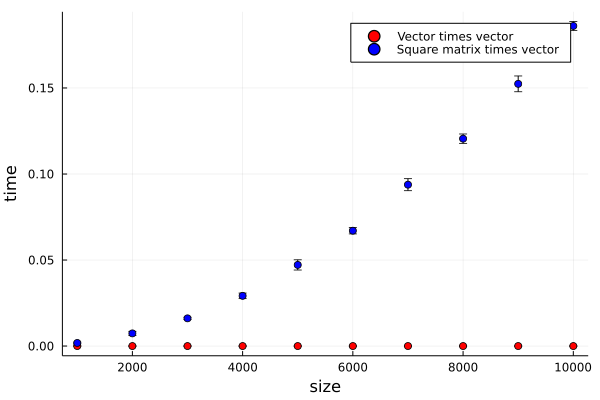

In [27]:
scatter(plot_data.size,[plot_data.v_times_v_mean plot_data.v_times_m_mean],
colour = [:red :blue],
yerr = [plot_data.v_times_v_std plot_data.v_times_m_std],
label = ["Vector times vector" "Square matrix times vector"],
xlab = "size",
ylab = "time")

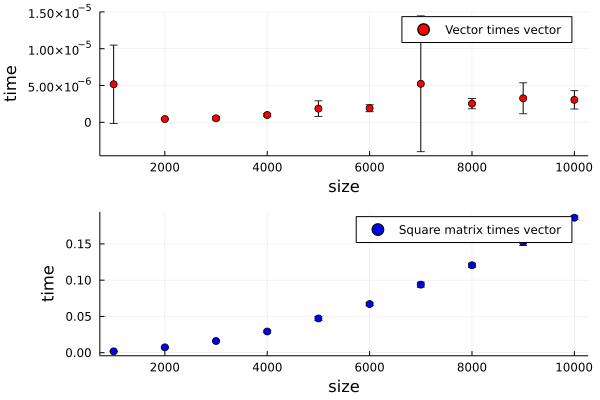

In [28]:
scatter(plot_data.size,[plot_data.v_times_v_mean plot_data.v_times_m_mean],
colour = [:red :blue],
yerr = [plot_data.v_times_v_std plot_data.v_times_m_std],
label = ["Vector times vector" "Square matrix times vector"],
xlab = "size",
ylab = "time",
layout = (2,1))

Czas obliczania iloczynu skalarnego dwóch wektorów rośnie mniej więcej liniowo względem długości wektora.\
Czas obliczenia iloczynu macierzy kwadratowej przez wektor rośnie mniej więcej kwadratowo względem długości wektora.